In [1]:
import pandas as pd 
import numpy as np
import os 
import re
import matplotlib.pyplot as plt

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Hypothesis </h2>
</div>


- Does the risk of survival increase with age? 
- Are women more likely to survive?
- Are single people more likely to survive?
- Is there a correlation with class and survival?
- Can i extract the title of the individuals to deduce class? 
- Is there information encoded in the ticket ?
- What is the importance of the embarcation port?
- How do I handle the incomplete information on the cabin number? Is the information about the cabin even relevant ?
- How do I handle missing data in the age column? 


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Import data </h2>
</div>


In [2]:
path = r'C:\Users\Agnes\OneDrive\Documents\GitHub\Data-Analyst-Portfolio\Titanic challenge\titanic'
train_path = os.path.join(path,'train.csv')
test_path = os.path.join(path,'test.csv')
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


survived_df = df[['PassengerId','Survived']]
survived_df
cols = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
df = df[cols]

## Merge the training and the test data frame:
df = pd.concat([df,test_df])
df

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. EDA </h2>
</div>


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Survivors by gender')

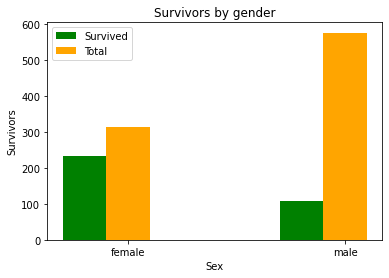

In [6]:
## Does the risk of survival increase with gender?
t = train_df[['Sex','Survived']].groupby(['Sex']).sum()
t['Total'] =  train_df[['Sex','Survived']].groupby(['Sex']).count()
t['Percentage_survived'] = t['Survived']/sum(t['Survived'])
t['Survival_rate_sex'] = t['Survived']/t['Total']

## Create the plot
x = np.arange(2)
y1 = t['Survived']
y2 = t['Total']
width =0.2
plt.bar(x-0.2,y1,width,color ='green')
plt.bar(x,y2,width,color = 'orange')
plt.xticks(x,t.index)
plt.xlabel("Sex")
plt.ylabel('Survivors')
plt.legend(['Survived','Total'])
plt.title('Survivors by gender')

We notice that 74% of women survived while only 18% of men survived. With no surprise out of the survivors, 68% of the survivors are women. It appears that being female increase chance of survival.

In [7]:
## Does the risk of survival increase with age? 
np.sort(train_df['Age'].unique())
# Create buckets by age 
train_df.loc[train_df['Age']<5,'age_bucket'] ='Baby'
train_df.loc[(train_df['Age']>=5) & (train_df['Age']<20),'age_bucket'] ='Child'
train_df.loc[(train_df['Age']>=20) & (train_df['Age']<50),'age_bucket'] ='Adult'
train_df.loc[train_df['Age']>=50,'age_bucket'] ='Elderly'
#train_df = train_df.sort_values(['age_bucket'])
#df

Text(0.5, 1.0, 'Survivors by age')

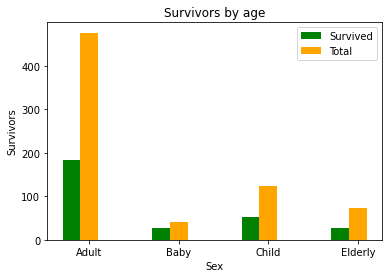

In [8]:
t=train_df[['age_bucket','Survived']].groupby(['age_bucket']).sum()
t['Total']=train_df[['age_bucket','Survived']].groupby(['age_bucket']).count()
t['Percentage_survived'] = t['Survived']/sum(t['Survived'])
t['Survival_rate_age'] = t['Survived']/t['Total']

## Create the plot
x = np.arange(4)
y1 = t['Survived']
y2 = t['Total']
width =0.2
plt.bar(x-0.2,y1,width,color ='green')
plt.bar(x,y2,width,color = 'orange')
plt.xticks(x,t.index)
plt.xlabel("Sex")
plt.ylabel('Survivors')
plt.legend(['Survived','Total'])
plt.title('Survivors by age')

In [9]:
## Number of passengers with not df['Age'].isnull().sum()

Text(0.5, 1.0, 'Survivors by embarcation port')

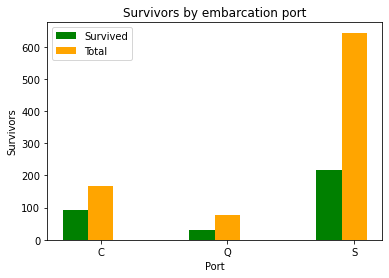

In [10]:
## Correlation between port and survival
t = train_df[['Survived','Embarked']].groupby('Embarked').sum()
t['Total']=train_df[['Survived','Embarked']].groupby(['Embarked']).count()
t['Percentage_survived'] = t['Survived']/sum(t['Survived'])
t['Survival_rate_port'] = t['Survived']/t['Total']

## Create the plot
x = np.arange(3)
y1 = t['Survived']
y2 = t['Total']
width =0.2
plt.bar(x-0.2,y1,width,color ='green')
plt.bar(x,y2,width,color = 'orange')
plt.xticks(x,t.index)
plt.xlabel("Port")
plt.ylabel('Survivors')
plt.legend(['Survived','Total'])
plt.title('Survivors by embarcation port')

In [11]:
## Find the single people on board 
train_df.loc[(train_df['SibSp'] ==0) &(train_df['Parch']==0),'Status'] = 'Single'
train_df.loc[(train_df['SibSp'] !=0) | (train_df['Parch']!=0),'Status'] = 'With Family'
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult,Single
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Child,Single
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult,Single


([<matplotlib.patches.Wedge at 0x292bbe19190>,
 [Text(0.08076356411649081, 1.0970311056260902, 'Single'),
  Text(-0.0807636668279551, -1.0970310980644546, 'With Family')],
 [Text(0.044052853154449526, 0.5983806030687764, '47.7%'),
  Text(-0.0440529091788846, -0.598380598944248, '52.3%')])

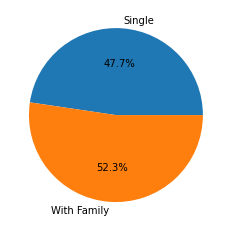

In [12]:
#plt.pie()
labels = 'Single','With Family'
train_df[['Status','Survived']].groupby('Status').sum()['Survived']
plt.pie(train_df[['Status','Survived']].groupby('Status').sum()['Survived'],labels =labels,autopct='%1.1f%%')

In [13]:
test_df.loc[(test_df['SibSp'] ==0) &(test_df['Parch']==0),'Status'] = 'Single'
test_df.loc[(test_df['SibSp'] !=0) | (test_df['Parch']!=0),'Status'] = 'With Family'
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Single
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,With Family
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Single
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Single
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,With Family
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Single
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Single
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Single
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Single


There is no strong correlation with boarding the ship as a single person or joining with the family.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Data preparation </h2>
</div>


In [14]:
## Joining the test and training set to prepare data 
df = pd.concat ([train_df,test_df])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,Status
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,With Family
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,With Family
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Single
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,With Family
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,Single
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,Single
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,Single
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,Single


KeyError: 'Individual Fare'

## Feature engineering

In [15]:
## Can I extract the titles from the names:
## let's use some regex yay!!
p = re.compile(',\s(\w+.)',re.IGNORECASE)
df['Title'] = df['Name'].apply(lambda x: p.search(x).group(1))

In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual fare,Sex female,Status Single,...,Title Lady.,Title Sir.,Title Mlle.,Title Col.,Title Capt.,Title the,Title Jonkheer.,Title Dona.,Pclass 1,Pclass 2
count,1309.000000,891.000000,1309.000000,1.309000e+03,1309.000000,1309.000000,1308.000000,1308.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,-1.054272e-16,0.498854,0.385027,33.295479,20.518215,0.644003,0.396486,...,0.001528,0.000764,0.578304,0.150497,0.001528,0.006112,0.000764,0.000764,0.211612,0.541635
std,378.020061,0.486592,0.837836,1.000382e+00,1.041658,0.865560,51.758668,35.774337,0.478997,0.489354,...,0.039073,0.027639,0.494019,0.357694,0.039073,0.077967,0.027639,0.027639,0.408607,0.498454
min,1.000000,0.000000,1.000000,-2.321788e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,-6.132700e-01,0.000000,0.000000,7.895800,7.452767,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,8.009234e-03,0.000000,0.000000,14.454200,8.512483,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,982.000000,1.000000,3.000000,3.963088e-01,1.000000,0.000000,31.275000,24.237500,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,3.891004e+00,8.000000,9.000000,512.329200,512.329200,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df[ 'Individual fare'] = df['Fare']/(df['SibSp']+df['Parch']+1) 
#df.sort_values(by =['Individual fare'],ascending = False)

#We notice that one passenger in the test set is lacking the fare data. Further investigation points to passenger id 1044
#in 3 rd class. 
#Since we only have one missing point I will attribute the mean fare ticket of 3rd class passenger tickets
avg_fare_third_class = df['Individual fare'].loc[df['Pclass'] == 3].mean()
df[['Individual fare']].loc[df['PassengerId'] == 1044] = avg_fare_third_class

C:\Users\Agnes\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Agnes\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [67]:
df.loc[df['PassengerId'] == 1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title Lady.,Title Sir.,Title Mlle.,Title Col.,Title Capt.,Title the,Title Jonkheer.,Title Dona.,Pclass 1,Pclass 2
152,1044,NaN,3,"Storey, Mr. Thomas",male,2.337806,0,0,3701,7.967487,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

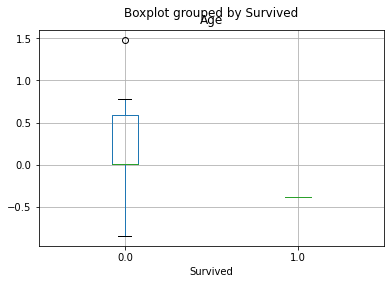

In [68]:
t = df.loc[df['Fare']==0]
t['Age']
t.boxplot('Age', by = 'Survived')

<AxesSubplot:title={'center':'Age'}, xlabel='Sex'>

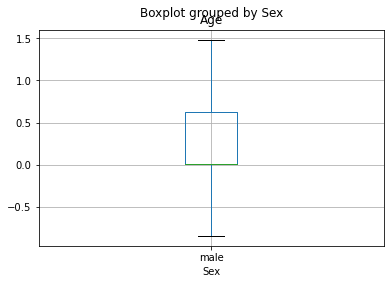

In [69]:
t.boxplot('Age', by = 'Sex')

We have individuals that did not pay the fare (about 15). They appear to be all male and between the age of 35 and 40. This suggest that they might have been members of the crew. In addition they seem to have a very low survival rate.
Further investigation of their title shows a **Jonkheer** (son of a Noble family in Norse country) suggests there might have been exceptions for titled individuals.
This information appears interesting but I don't have an individual use for this. 

In [70]:
## Find the average age per category
df.groupby('age_bucket').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual fare,Sex female,Status Single,...,Title Lady.,Title Sir.,Title Mlle.,Title Col.,Title Capt.,Title the,Title Jonkheer.,Title Dona.,Pclass 1,Pclass 2
age_bucket,,,,,,,,,,,,,,,,,,,,,
Adult,453.044118,0.386555,2.241597,0.121889,0.342437,0.319328,33.879367,22.622896,0.655462,0.365546,...,0.004202,0.002101,0.634454,0.176471,0.002101,0.006303,0.002101,0.002101,0.250000,0.495798
Baby,414.050000,0.675000,2.550000,-2.145112,1.700000,1.375000,32.409063,8.347483,0.575000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.625000
Child,444.330645,0.419355,2.524194,-1.148121,0.927419,0.645161,31.596573,14.047730,0.532258,0.564516,...,0.000000,0.000000,0.427419,0.072581,0.000000,0.000000,0.000000,0.000000,0.185484,0.669355
Elderly,445.675676,0.364865,1.554054,2.146805,0.270270,0.283784,46.364415,28.105284,0.702703,0.351351,...,0.000000,0.000000,0.581081,0.202703,0.000000,0.040541,0.000000,0.000000,0.256757,0.148649


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Modelling </h2>
</div>


### Creating a decision tree classifier with the following features 
    - sex
    - age bucket 
    - title 

In [71]:
### OHE of categorical data:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)

def ohe_func (df, col, df1 = df, name = 'Type ',ohe = ohe):
    index_names = df1[col].unique()
    for i in range(1,len(index_names)):
        col_name = name + str(index_names[i] )
        df1[col_name] = ohe.fit_transform(df1[[col]])[:,i]
    return df1 

In [72]:
df = ohe_func(df['Sex'], 'Sex', df1 = df , name = 'Sex ', ohe = ohe)
df = ohe_func(df['Status'], 'Status', df1 = df , name = 'Status ', ohe = ohe)
df = ohe_func(df['Embarked'], 'Embarked', df1 = df , name = 'Embarked ', ohe = ohe)
df = ohe_func(df['Title'], 'Title', df1 = df , name = 'Title ', ohe = ohe)
df = ohe_func(df['Pclass'], 'Pclass', df1 = df , name = 'Pclass ', ohe = ohe)

In [73]:
from sklearn.impute import KNNImputer
age_imputer = KNNImputer(missing_values = np.nan, n_neighbors=5)
df[['Age']] = age_imputer.fit_transform(np.array(df['Age']).reshape(-1,1)).round()

assert df['Age'].isnull().sum() == 0, 'There are  null values in the age column'

In [74]:
### What is a decision tree classifier: 

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [76]:
n = len(train_df)
X = df.iloc[0:n].drop(columns = ['Survived','age_bucket','Cabin','Embarked','Name','Sex','Pclass','SibSp','Parch','Ticket','Fare','Cabin','Status','Title'])
y = df.iloc[0:n]['Survived']
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                   stratify=y, random_state =42)

In [78]:
dt_classifier  = DecisionTreeClassifier(criterion = 'gini')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
## Scoring our model:
print('The training set accuracy is:%0.04f' %(dt_classifier.score(X_train,y_train)))
print('The test set accuracy is:%.04f' %(dt_classifier.score(X_test,y_test)))

The training set accuracy is:1.0000
The test set accuracy is:0.7151


Our initial model is overfitting. One way to correct this would be to tune the parameters of our  decision trees such as:
    - max number of leafs per node 
    - depth of the tree 
    - prunning 

In [80]:
## Retuned decision tree Classifier 
dt_classifier = DecisionTreeClassifier (criterion ='gini',
                                        splitter = 'best',
                                        max_depth = 5,
                                        min_samples_leaf = 2
                                       )
dt_classifier.fit(X_train, y_train)
## Scoring our model:
print('The training set accuracy is:%0.04f' %(dt_classifier.score(X_train,y_train)))
print('The test set accuracy is:%.04f' %(dt_classifier.score(X_test,y_test)))

The training set accuracy is:0.8806
The test set accuracy is:0.7709


The factor that seems to have the most influence on the data is the max_depth criterion (set at 5). Earlier we did not normalize the ages.
Let's normalise the age and observe our results.

In [81]:
## Normalise the age range 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(np.array(df['Age']).reshape(-1,1))

X = df.iloc[0:n].drop(columns = ['Survived','age_bucket','Cabin','Embarked','Name','Sex','Pclass','SibSp','Parch','Ticket',
                             'Fare','Cabin','Status','Title'])
y = df.iloc[0:n]['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                   stratify=y, random_state =42)
## Retuned decision tree Classifier and normalised age range 
dt_classifier = DecisionTreeClassifier (criterion ='gini',
                                        splitter = 'best',
                                        max_depth = 5,
                                        min_samples_leaf = 2
                                       )
dt_classifier.fit(X_train, y_train)
## Scoring our model:
print('The training set accuracy is:%0.04f' %(dt_classifier.score(X_train,y_train)))
print('The test set accuracy is:%.04f' %(dt_classifier.score(X_test,y_test)))

The training set accuracy is:0.8806
The test set accuracy is:0.7709


## Normalising the data had no effect on the performance of our model. 
##Let's keep the following features: SibSp, Parch in the model and remove the status column from the table

X = df.iloc[0:n].drop(columns = ['Survived', 'age_bucket','Cabin','Sex', 'Embarked','Name','Pclass','Ticket','Fare', 'Cabin','Status',
                             'Status Single','Title' ])
y = df.iloc[0:n]['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                   stratify=y, random_state =42)
## Retuned decision tree Classifier and normalised age range 
dt_classifier = DecisionTreeClassifier (criterion ='gini',
                                        splitter = 'best',
                                        max_depth = 5,
                                       min_samples_leaf = 1
                                       )
dt_classifier.fit(X_train, y_train)
## Scoring our model:
print('The training set accuracy is:%0.04f' %(dt_classifier.score(X_train,y_train)))
print('The test set accuracy is:%.04f' %(dt_classifier.score(X_test,y_test)))

## This model is not as good so can be discarded

In [82]:
## Validation on our hold out set:

X_test= df.iloc[n+1:].drop(columns = ['Survived','age_bucket','Cabin','Embarked','Name','Sex','Pclass','SibSp','Parch','Ticket',
                             'Fare','Cabin','Status','Title'])
y_test = dt_classifier.predict(X_test)

The hold out set accuracy is: 1.0000


In [83]:
X_test.loc[X_test['Individual fare'].isnull()]
test_df.loc[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Single


## Random Forest 
We are now going to use an ensemble method, the random forest model

In [126]:
from  sklearn.ensemble import RandomForestClassifier

In [127]:
X = df.iloc[0:n].drop(columns = ['Survived','age_bucket','Cabin','Embarked','Name','Sex','Pclass','SibSp','Parch','Ticket',
                             'Fare','Cabin','Status','Title'])
y = df.iloc[0:n]['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                   stratify=y, random_state =42)

In [136]:
rf = RandomForestClassifier ( n_estimators = 65,
                              criterion ='gini',
                              max_depth = 3,
                              min_samples_split = 2,
                              min_samples_leaf =1,
                              min_weight_fraction_leaf = 0.0,
                              max_features ='auto',
                              max_leaf_nodes =None,
                              min_impurity_decrease = 0.0,
                              min_impurity_split = None,
                              bootstrap = True,
                              oob_score = False,
                              n_jobs = None,
                              random_state = 42,
                              verbose = 0,
                              warm_start = False,
                              class_weight = None,
                              ccp_alpha =0.0,
                              max_samples  = None
                        )

rf.fit(X_train,y_train)

print('The training set accuracy is:%0.04f' %(rf.score(X_train,y_train)))
print('The test set accuracy is:%.04f' %(rf.score(X_test,y_test)))

The training set accuracy is:0.8244
The test set accuracy is:0.8101


In [138]:
## Validation on our hold out set:

X_test= df.iloc[n:].drop(columns = ['Survived','age_bucket','Cabin','Embarked','Name','Sex','Pclass','SibSp','Parch','Ticket',
                             'Fare','Cabin','Status','Title'])
y_test = dt_classifier.predict(X_test)

In [139]:
X_test['Survived'] = y_test

In [140]:
X_test[['PassengerId','Survived']].to_csv('titanic_v01.csv')

,PassengerId,Survived
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
5,897,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
